In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(826, 609, 3)


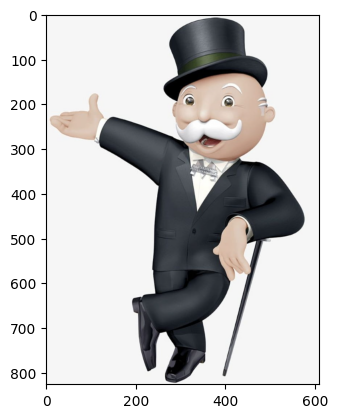

In [58]:
monopoly = cv2.imread('monopoly.png', cv2.IMREAD_COLOR)
monopoly_float = np.float32(monopoly) / 255
print(monopoly_float.shape)
plt.imshow(monopoly_float[...,::-1])
plt.show()

(154, 154, 4)


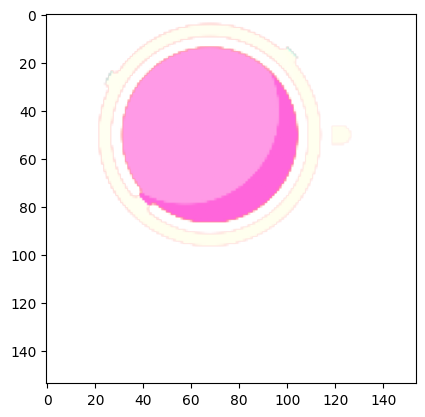

In [59]:
monoculo = cv2.imread('monoculo.png', cv2.IMREAD_UNCHANGED)
monoculo_float = np.float32(monoculo) / 255
monoculo_resized = cv2.resize(monoculo_float, None, fx = 0.3, fy = 0.3) 
print(monoculo_resized.shape)
plt.imshow(monoculo_resized[...,::-1])
plt.show()

(154, 154, 1)


Text(0.5, 1.0, 'Monoculo mascara')

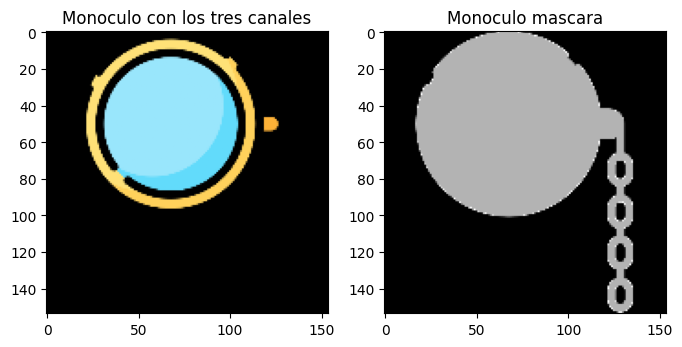

In [60]:
monoculo_img = monoculo_resized[:,:,0:3]
monoculo_mask = monoculo_resized[:,:,3:]
monoculo_mask[monoculo_mask==1] = 0.7

plt.figure(figsize = [8,8])
plt.subplot(121)
plt.imshow(monoculo_img[...,::-1])
plt.title('Monoculo con los tres canales')

alto_monoculo, ancho_monoculo, _ = monoculo_img.shape
print(monoculo_mask.shape)
plt.subplot(122)
plt.imshow(monoculo_mask[...,::-1], cmap='gray')
plt.title('Monoculo mascara')

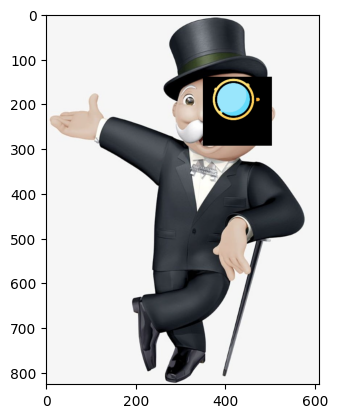

In [61]:
monopoly_float_copy = monopoly_float.copy()
monopoly_float_copy [140:140+alto_monoculo, 350:350+ancho_monoculo] = monoculo_img
plt.imshow(monopoly_float_copy[...,::-1])
plt.show()

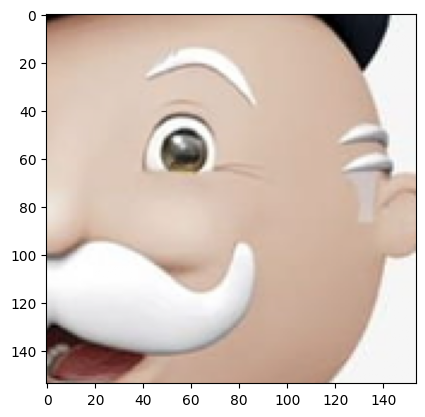

In [62]:
monoculo_mask_three = cv2.merge((monoculo_mask, monoculo_mask, monoculo_mask))  

roi_monopoly = monopoly_float.copy()
roi_monopoly = roi_monopoly[140:140+alto_monoculo, 350:350+ancho_monoculo]
plt.imshow(roi_monopoly[...,::-1])

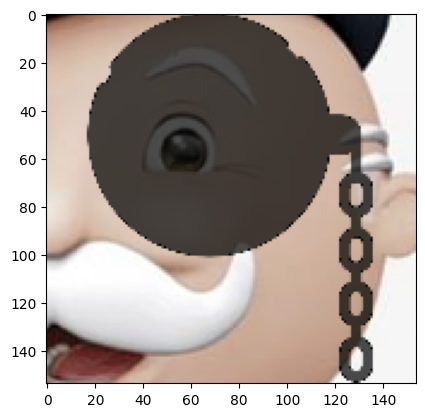

In [63]:
roi_monopoly_mask = roi_monopoly * (1 - monoculo_mask_three)
plt.imshow(roi_monopoly_mask[...,::-1])

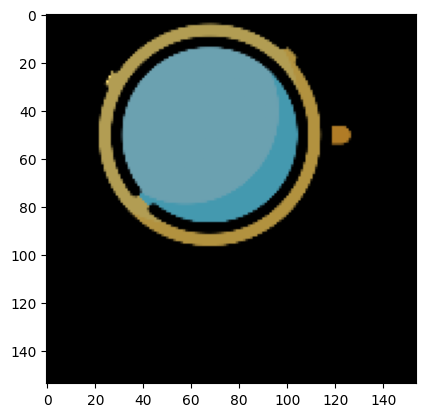

In [64]:
monoculo_data_extracted = cv2.multiply(monoculo_img, monoculo_mask_three)
plt.imshow(monoculo_data_extracted[...,::-1])

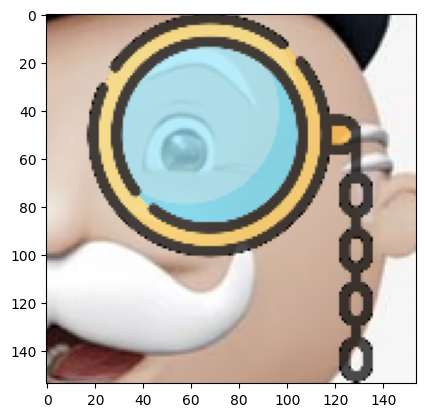

In [65]:
monopoly_plus_monoculo = cv2.add(roi_monopoly_mask, monoculo_data_extracted)
plt.imshow(monopoly_plus_monoculo[...,::-1])

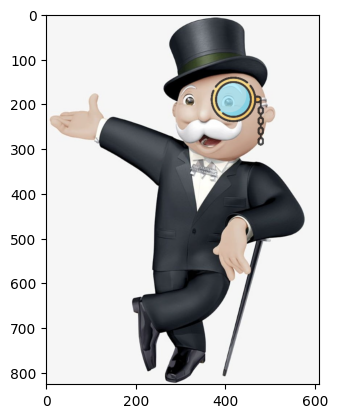

In [66]:
monopoly_final = monopoly_float.copy()
monopoly_final[140:140+alto_monoculo, 350:350+ancho_monoculo] = monopoly_plus_monoculo
plt.imshow(monopoly_final[...,::-1])